In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import scipy.stats as stats
import scipy.io 

#from google.colab import files

In [8]:
#Model initialization
LO = 1.2
NO = 600

xO = np.linspace(0,LO,NO)
dxO = xO[1] - xO[0]

t_f = 9.6
#t_f = 19.2
t_N = 9600
#t_N = 9600*2
#t_N = 19200
t = np.linspace(0,t_f,t_N)
dt = t[1] - t[0]

W = 10

In [9]:
KO = scipy.io.loadmat('Ocean_Problem_Kelvin.mat')
RO = scipy.io.loadmat('Ocean_Problem_Rossby.mat')

KO = KO['Kelvin']
RO = RO['Rossby']

In [10]:
s1 = [1, -1.31016238, -0.01091148,  1.75510964,  1.34064977,
        0.74289848, -1.29238952,  1.01496108,  0.29581112,  2.0310513 ]

s2 = [1,  0.36779045, -0.59746417, -0.09693111,  0.02154559,
       -0.38169676, -0.70409408,  0.34561602, -0.69913209, -0.11008746]

s3 = [ 1,  0.01943823, -0.25818612,  0.67234517,  0.84482616,
       -1.08320474,  2.04939414,  0.4994491 ,  1.12758265, -2.17161282]

s4 = [1, -0.10045143, -0.12001855, -0.00880584,  0.8218604 ,
        0.38103828,  0.17854067,  1.53158465, -0.34151504, -0.6532473 ]

s5 = [1,  0.77187577, -0.66297583,  1.34244151,  0.76460177,
       -1.28901347,  0.14140701, -1.50445308, -1.17630076, -1.20493444]

In [11]:
KO_0 =  np.zeros((t_N,NO))
KO_W1 =  np.zeros((t_N,NO))
KO_W2 =  np.zeros((t_N,NO))
KO_W3 =  np.zeros((t_N,NO))
KO_W4 =  np.zeros((t_N,NO))
KO_W5 =  np.zeros((t_N,NO))


RO_0 =  np.zeros((t_N,NO))
RO_W1 =  np.zeros((t_N,NO))
RO_W2 =  np.zeros((t_N,NO))
RO_W3 =  np.zeros((t_N,NO))
RO_W4 =  np.zeros((t_N,NO))
RO_W5 =  np.zeros((t_N,NO))

In [12]:
for i in range(t_N):
    for j in range(0,NO):
        for k in range(0,W):
            KO_W1[i,j] += s1[k]*KO[k,i,j] 
            KO_W2[i,j] += s2[k]*KO[k,i,j] 
            KO_W3[i,j] += s3[k]*KO[k,i,j] 
            KO_W4[i,j] += s4[k]*KO[k,i,j] 
            KO_W5[i,j] += s5[k]*KO[k,i,j] 
            RO_W1[i,j] += s1[k]*RO[k,i,j]
            RO_W2[i,j] += s2[k]*RO[k,i,j]
            RO_W3[i,j] += s3[k]*RO[k,i,j]
            RO_W4[i,j] += s4[k]*RO[k,i,j]
            RO_W5[i,j] += s5[k]*RO[k,i,j]

/tmp/ipykernel_254777/1237083222.py:95: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar


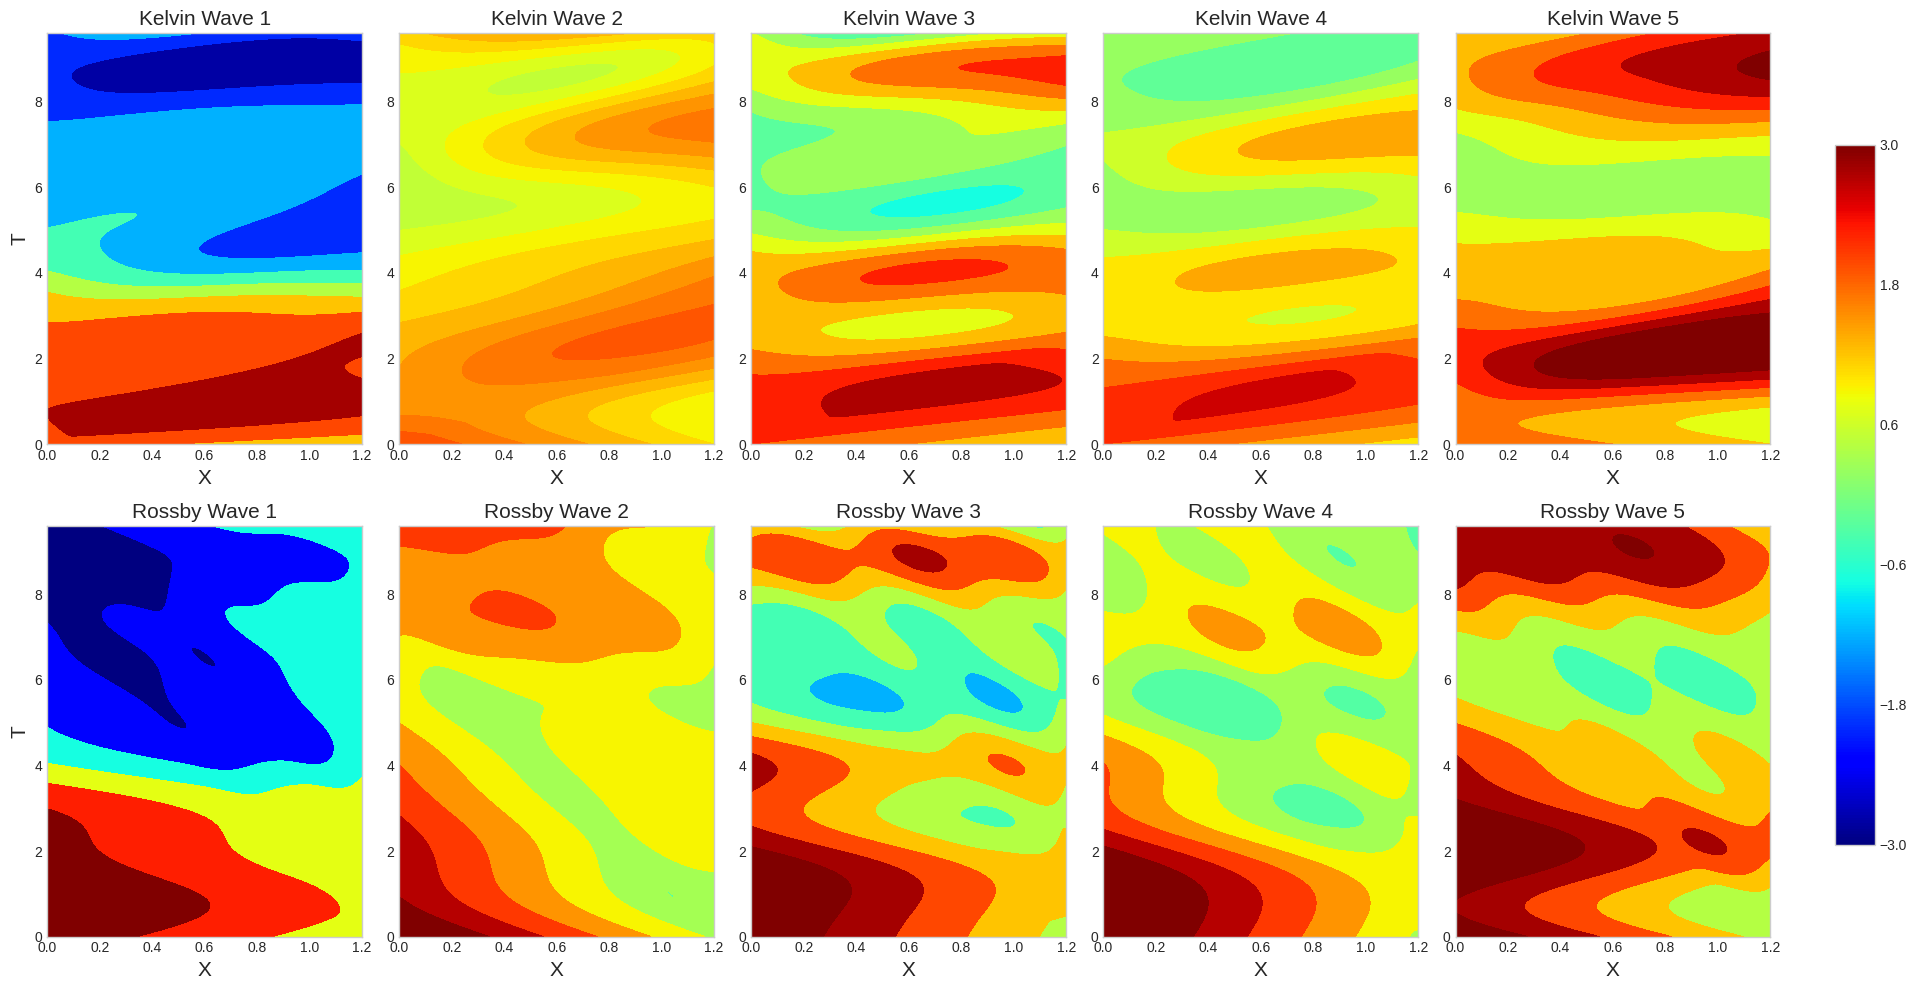

In [33]:
import matplotlib.pyplot as plt
import numpy as np

vmin = -3
vmax = 3

fig, ax = plt.subplots(2, 5, figsize=(20, 10))

# Plot 1: KO_W1
cs = ax[0, 0].contourf(xO, t, KO_W1, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(KO_W1)
m.set_clim(vmin, vmax)
ax[0, 0].set_title('Kelvin Wave 1', fontsize=15)
ax[0, 0].set_ylabel('T', fontsize=15)
ax[0, 0].set_xlabel('X', fontsize=15)

# Plot 2: KO_W2
cs = ax[0, 1].contourf(xO, t, KO_W2, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(KO_W2)
m.set_clim(vmin, vmax)
ax[0, 1].set_title('Kelvin Wave 2', fontsize=15)
ax[0, 1].set_xlabel('X', fontsize=15)

# Plot 3: KO_W3
cs = ax[0, 2].contourf(xO, t, KO_W3, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(KO_W3)
m.set_clim(vmin, vmax)
ax[0, 2].set_title('Kelvin Wave 3', fontsize=15)
ax[0, 2].set_xlabel('X', fontsize=15)

# Plot 4: KO_W4
cs = ax[0, 3].contourf(xO, t, KO_W4, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(KO_W4)
m.set_clim(vmin, vmax)
ax[0, 3].set_title('Kelvin Wave 4', fontsize=15)
ax[0, 3].set_xlabel('X', fontsize=15)

# Plot 5: KO_W5
cs = ax[0, 4].contourf(xO, t, KO_W5, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(KO_W5)
m.set_clim(vmin, vmax)
ax[0, 4].set_title('Kelvin Wave 5', fontsize=15)
ax[0, 4].set_xlabel('X', fontsize=15)

# Plot 6: RO_W1
cs = ax[1, 0].contourf(xO, t, RO_W1, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(RO_W1)
m.set_clim(vmin, vmax)
ax[1, 0].set_title('Rossby Wave 1', fontsize=15)
ax[1, 0].set_ylabel('T', fontsize=15)
ax[1, 0].set_xlabel('X', fontsize=15)

# Plot 7: RO_W2
cs = ax[1, 1].contourf(xO, t, RO_W2, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(RO_W2)
m.set_clim(vmin, vmax)
ax[1, 1].set_title('Rossby Wave 2', fontsize=15)
ax[1, 1].set_xlabel('X', fontsize=15)

# Plot 8: RO_W3
cs = ax[1, 2].contourf(xO, t, RO_W3, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(RO_W3)
m.set_clim(vmin, vmax)
ax[1, 2].set_title('Rossby Wave 3', fontsize=15)
ax[1, 2].set_xlabel('X', fontsize=15)

# Plot 9: RO_W4
cs = ax[1, 3].contourf(xO, t, RO_W4, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(RO_W4)
m.set_clim(vmin, vmax)
ax[1, 3].set_title('Rossby Wave 4', fontsize=15)
ax[1, 3].set_xlabel('X', fontsize=15)

# Plot 10: RO_W5
cs = ax[1, 4].contourf(xO, t, RO_W5, cmap='jet', vmin=vmin, vmax=vmax)
m = plt.cm.ScalarMappable(cmap='jet')
m.set_array(RO_W5)
m.set_clim(vmin, vmax)
ax[1, 4].set_title('Rossby Wave 5', fontsize=15)
ax[1, 4].set_xlabel('X', fontsize=15)

# Add a single color bar for the entire plot
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position as needed
fig.colorbar(m, cax=cbar_ax, ticks=np.linspace(vmin, vmax, 6), orientation='vertical', shrink=0.8)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit colorbar
plt.savefig("Problem1_Ensemble_2D_Contour_Plots.png")
plt.show()
